In [1]:
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
import ringdown.qnms
import makefun
from scipy.optimize import curve_fit
import statistics
import pandas as pd
import matplotlib.lines as mlines

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [8]:
def modes(l,m):    
    inclination = [0, np.pi/6, np.pi/3, np.pi/2]
    for i in inclination:        
        hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                    mass1=40,
                                    mass2=40,
                                    delta_t=1.0/16384,
                                    f_lower=30,
                                    distance=1e-14,
                                    inclination=i,
                                    spin1x=0,
                                    spin1y=0,
                                    spin1z=0,
                                    spin2x=0,
                                    spin2y=0,
                                    spin2z=0,
                                    mode_array=[[l,m]])
        # sample times ---> timeseries
        hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
        cond = hp_smp_ts.crop(0.645,0)                                      

        # h+/hx data ---> timeseries
        hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
        cond_hp = hp_data.crop(0.645,0)
        hp_signal = cond_hp.numpy()                  

        # repeat
        hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
        cond_hc = hc_data.crop(0.645,0)
        hc_signal = cond_hc.numpy()                                         

        # use for hp+hc ringdown analysis
        time = cond.numpy()             

        plt.figure(figsize=(10,4))
        plt.plot(cond, cond_hc, label='IMR XPHM Plus')
        plt.xlim(0, 0.03)
        plt.legend()
        plt.title(f'Inclination: {i}',fontsize=25)
        plt.xlabel('Time (s)',fontsize=20)
        plt.ylabel('Strain',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)

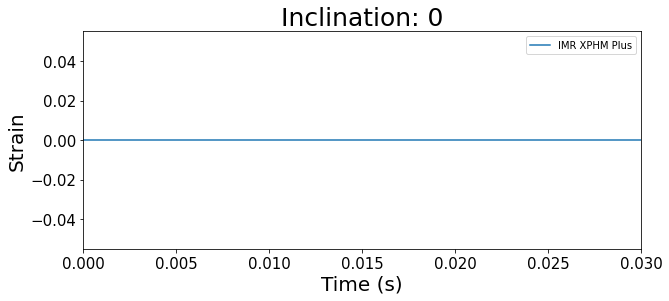

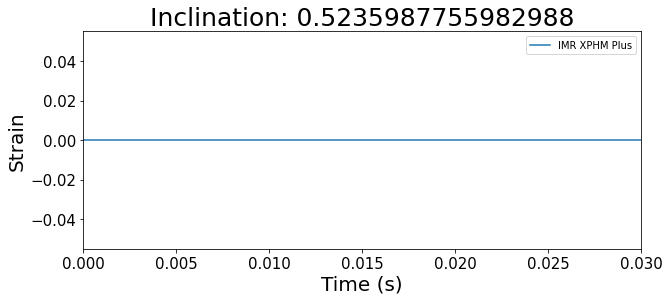

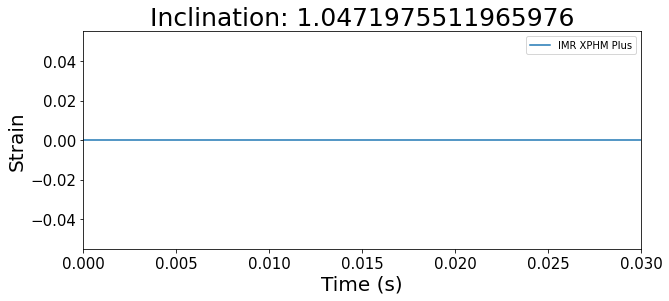

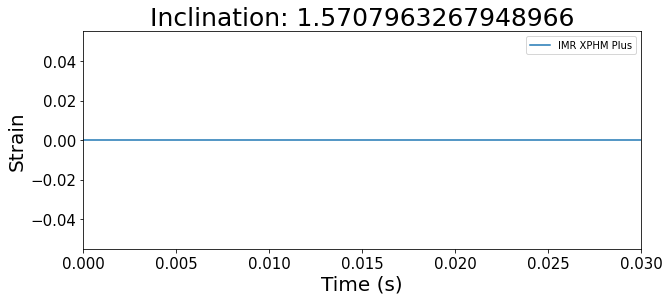

In [9]:
modes(2,1)

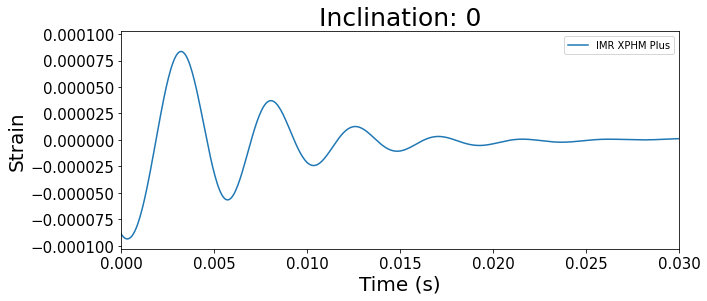

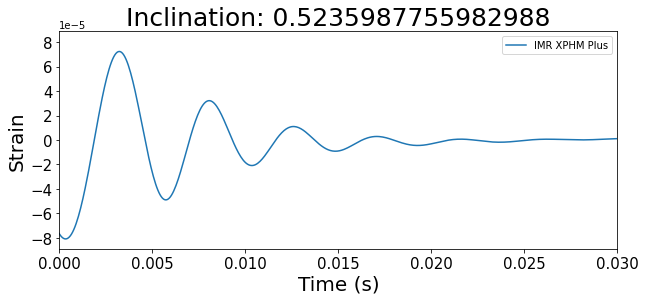

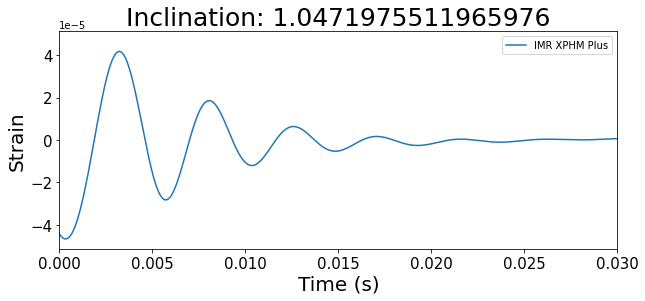

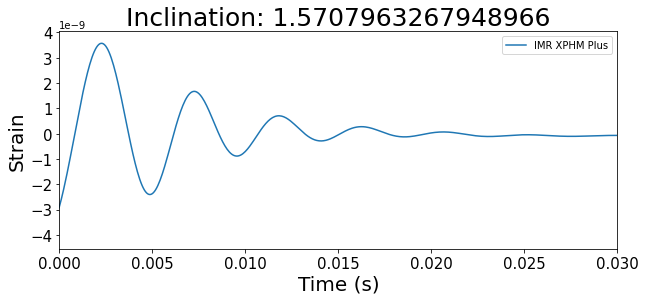

In [10]:
modes(2,2)

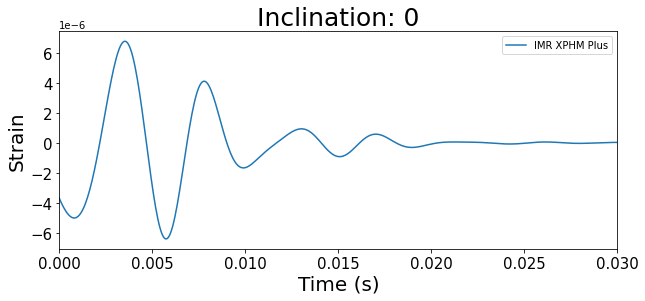

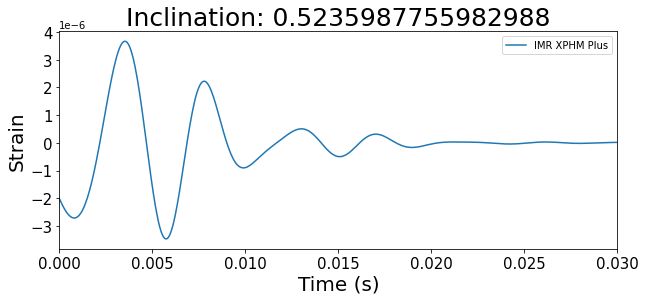

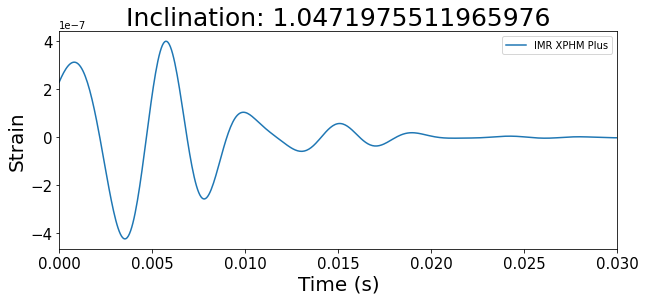

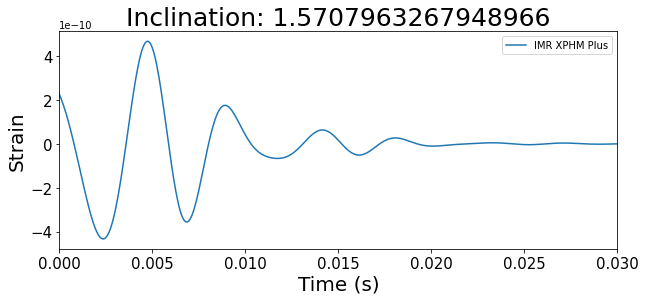

In [11]:
modes(3,2)

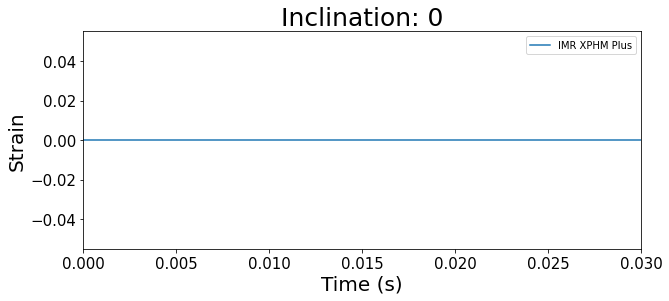

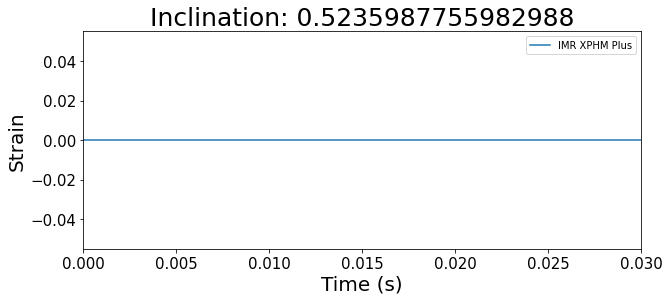

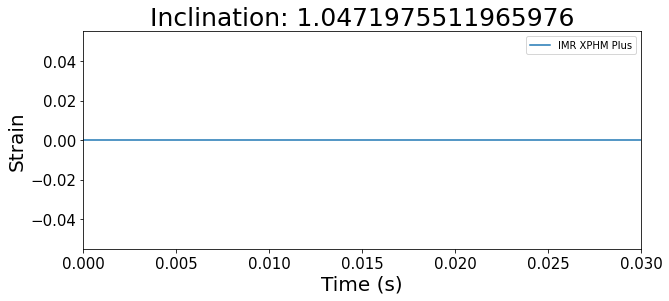

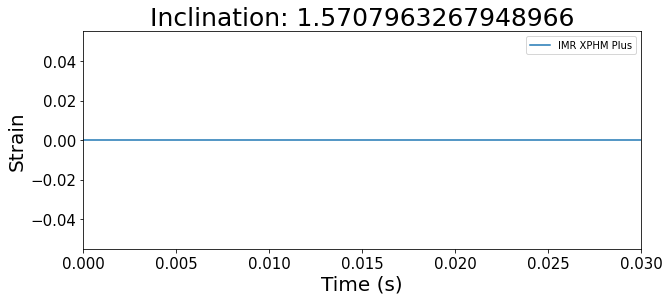

In [12]:
modes(3,3)

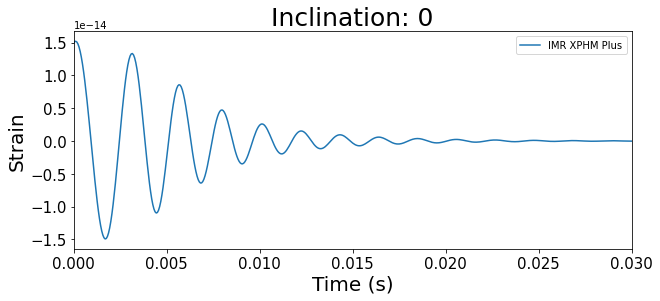

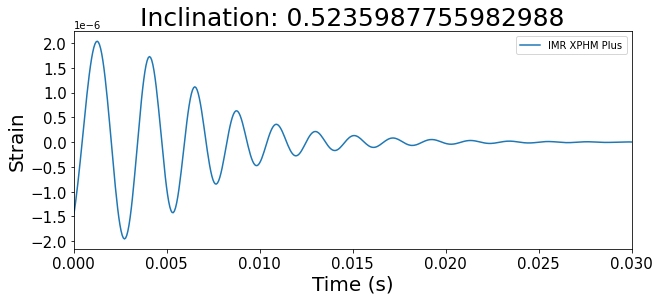

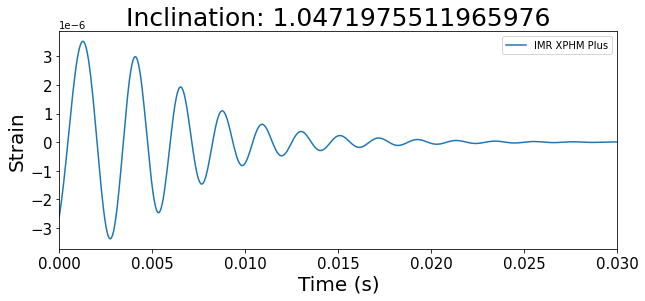

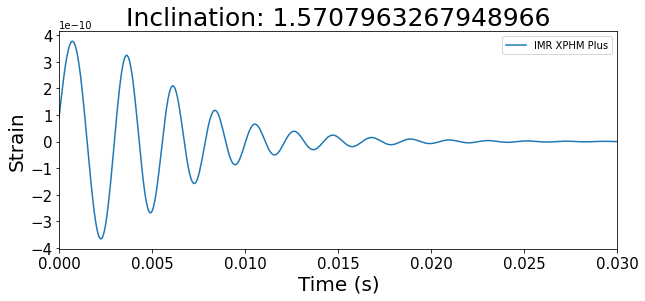

In [13]:
modes(4,4)